In [3]:

import os
import random
import cv2
import torch
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib as mpl
from tqdm import tqdm
from colorama import Fore, Style
import exifread

# Set the font family to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

%matplotlib inline

folder_path = '../data/raw/'

(1440, 1920, 3)


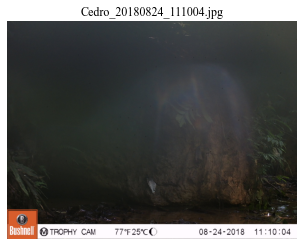

In [4]:
# Choose a random image
random_image = random.choice(os.listdir(folder_path))

# Display the random image
image_path = os.path.join(folder_path, random_image)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)
plt.axis("off")
plt.title(random_image)

plt.show()

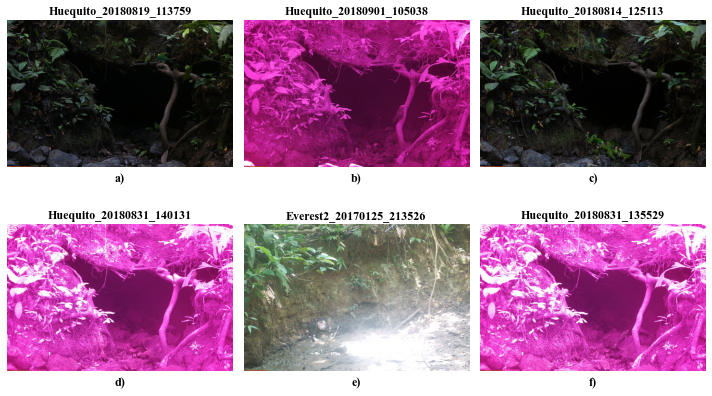

In [5]:
# Choose 6 random images
random_images = random.sample(os.listdir(folder_path), 6)

# Display and save the 6 random images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
labels = ["a)", "b)", "c)", "d)", "e)", "f)"]

# Iterate over the axes and plot the random images
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(folder_path, random_images[i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image[:-190, :, :]

    ax.imshow(image)
    ax.axis("off")

    # Set the title of each subfigure as the file name
    title = os.path.splitext(random_images[i])[0]
    ax.set_title(title, fontweight='bold')

    # Add labels under each subfigure
    ax.text(0.5, -0.1, labels[i], transform=ax.transAxes, fontsize=12, fontweight='bold', ha='center')

plt.tight_layout()

# Save the figure with the grid of images as a single image
save_path = "../images/Sample_images.jpg"
canvas = FigureCanvas(fig)
fig.savefig(save_path, dpi=300)

# Show the figure with the grid of images
plt.show()

In [6]:
import os
import random
import cv2
import torch
import pandas as pd
import exifread
from tqdm import tqdm
from colorama import Fore, Style

from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Set the path to the folder containing the images
folder_path = '../data/raw/'

In [7]:

# Initialize lists to store image information
image_names = []
site_names = []
dates = []
dimensions = []
times = []
image_descriptions = []
makes = []
models = []
orientations = []
x_resolutions = []
y_resolutions = []
resolution_units = []
softwares = []
date_times = []
ycbcr_positions = []
tag_0x8292 = []
exif_offsets = []
gps_altitudes = []
gps_speeds = []
gps_img_directions = []
gps_infos = []

# Iterate over all image files in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg') or file.endswith('.png')]
random_images = random.sample(image_files, 500)  # Randomly select 500 images
for filename in tqdm(image_files, desc="Processing images", bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt}", colour="#336699", ncols=75):
    # Split the filename into site name, date, and time
    parts = os.path.splitext(filename)[0].split("_")
    site_name = parts[0].capitalize()
    date = parts[1]
    time = parts[2]

    # Get the pixel dimensions of the image
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)
    dimensions.append(f"{image.shape[0]}x{image.shape[1]}")
    
    # Add the image information to the respective lists
    image_names.append(filename)
    site_names.append(site_name)
    dates.append(date)
    times.append(time)

    # Load the image and extract metadata
    image_path = os.path.join(folder_path, filename)
    with open(image_path, 'rb') as f:
        tags = exifread.process_file(f)

    # Extract the desired metadata tags
    image_descriptions.append(tags.get('Image ImageDescription'))
    makes.append(tags.get('Image Make'))
    models.append(tags.get('Image Model'))
    orientations.append(tags.get('Image Orientation'))
    x_resolutions.append(tags.get('Image XResolution'))
    y_resolutions.append(tags.get('Image YResolution'))
    resolution_units.append(tags.get('Image ResolutionUnit'))
    softwares.append(tags.get('Image Software'))
    date_times.append(tags.get('Image DateTime'))
    ycbcr_positions.append(tags.get('Image YCbCrPositioning'))
    tag_0x8292.append(tags.get('Image Tag 0x8292'))
    exif_offsets.append(tags.get('Image ExifOffset'))
    gps_altitudes.append(tags.get('GPS GPSAltitude'))
    gps_speeds.append(tags.get('GPS GPSSpeed'))
    gps_img_directions.append(tags.get('GPS GPSImgDirection'))
    gps_infos.append(tags.get('Image GPSInfo'))

# Create a DataFrame to store the image information
data = {
    'Image Name': image_names,
    'Site': site_names,
    'Date': dates,
    'Dimensions': dimensions,
    'Time': times,
    'ImageDescription': image_descriptions,
    'Make': makes,
    'Model': models,
    'Orientation': orientations,
    'XResolution': x_resolutions,
    'YResolution': y_resolutions,
    'ResolutionUnit': resolution_units,
    'Software': softwares,
    'DateTime': date_times,
    'YCbCrPositioning': ycbcr_positions,
    'Tag0x8292': tag_0x8292,
    'ExifOffset': exif_offsets,
    'GPSAltitude': gps_altitudes,
    'GPSSpeed': gps_speeds,
    'GPSImgDirection': gps_img_directions,
    'GPSInfo': gps_infos
}
df = pd.DataFrame(data)


Processing images: 100%|████████████████████████████████████████| 3540/3540


In [10]:
df.head()

,Image Name,Site,Date,Dimensions,Time,ImageDescription,Make,Model,Orientation,XResolution,...,ResolutionUnit,Software,DateTime,YCbCrPositioning,Tag0x8292,ExifOffset,GPSAltitude,GPSSpeed,GPSImgDirection,GPSInfo
0,Cedro_20180824_110649.jpg,Cedro,20180824,1440x1920,110649,M2E71A1L85-120.0139999-120.0139999,BUSHNELL,,Horizontal (normal),72,...,Pixels/Inch,BS686C2Dx14232,2018:08:24 11:06:49,Co-sited,"[67, 111, 112, 121, 114, 105, 103, 104, 116, 3...",366,85,1370,1,42474
1,Cedro_20180824_110650.jpg,Cedro,20180824,1440x1920,110650,M2E71A1L85-120.0139999-120.0139999,BUSHNELL,,Horizontal (normal),72,...,Pixels/Inch,BS686C2Dx14232,2018:08:24 11:06:50,Co-sited,"[67, 111, 112, 121, 114, 105, 103, 104, 116, 3...",366,85,1370,1,42474
2,Cedro_20180824_110651.jpg,Cedro,20180824,1440x1920,110651,M2E71A1L85-120.0139999-120.0139999,BUSHNELL,,Horizontal (normal),72,...,Pixels/Inch,BS686C2Dx14232,2018:08:24 11:06:51,Co-sited,"[67, 111, 112, 121, 114, 105, 103, 104, 116, 3...",366,85,1370,1,42474
3,Cedro_20180824_110729.jpg,Cedro,20180824,1440x1920,110729,M2E70A1L84-81.0350036-81.0350036,BUSHNELL,,Horizontal (normal),72,...,Pixels/Inch,BS686BWNx14215,2018:08:24 11:07:29,Co-sited,"[67, 111, 112, 121, 114, 105, 103, 104, 116, 3...",364,84,1350,1,42472
4,Cedro_20180824_110752.jpg,Cedro,20180824,1440x1920,110752,M2E73A1L87-74.3170013-74.3170013,BUSHNELL,,Horizontal (normal),72,...,Pixels/Inch,BS686BWNx14215,2018:08:24 11:07:52,Co-sited,"[67, 111, 112, 121, 114, 105, 103, 104, 116, 3...",364,87,1401,1,42472


In [8]:
# Save the DataFrame to an Excel file
excel_path = '../data/processed/image_info.xlsx'
df.to_excel(excel_path, index=False)

In [9]:
# Choose a random image
# random_image = random.choice(image_files)
# random_image_path = os.path.join(folder_path, random_image)

# # Load the image and extract metadata
# image = cv2.imread(random_image_path)
# with open(random_image_path, 'rb') as f:
#     tags = exifread.process_file(f)

# # Display metadata as text output
# print(f'{Fore.RED}Image: {random_image}')
# print('Metadata:')
# for tag in tags.keys():
#     print(f'{Fore.GREEN}{tag}: {tags[tag]}')

In [13]:
from PIL import Image, ImageOps


def padding(img, expected_size):
    desired_size = expected_size
    delta_width = desired_size[0] - img.size[0]
    delta_height = desired_size[1] - img.size[1]
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
    return ImageOps.expand(img, padding)


def resize_with_padding(img, expected_size):
    img.thumbnail((expected_size[0], expected_size[1]))
    # print(img.size)
    delta_width = expected_size[0] - img.size[0]
    delta_height = expected_size[1] - img.size[1]
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
    return ImageOps.expand(img, padding)


if __name__ == "__main__":
    img = random.choice(os.listdir(folder_path))
    img = os.path.join(folder_path, random_image)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = resize_with_padding(img, (446, 446))
    print(img.size)
    img.show()
    img.save("../images/resized_img.jpg")

AttributeError: 'numpy.ndarray' object has no attribute 'thumbnail'

In [16]:
import cv2

desired_size = 446
im_pth = "../data/raw/Cedro_20180824_110649.jpg"

im = cv2.imread(im_pth)
old_size = im.shape[:2] # old_size is in (height, width) format

ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])

# new_size should be in (width, height) format

im = cv2.resize(im, (new_size[1], new_size[0]))

delta_w = desired_size - new_size[1]
delta_h = desired_size - new_size[0]
top, bottom = delta_h//2, delta_h-(delta_h//2)
left, right = delta_w//2, delta_w-(delta_w//2)

color = [0, 0, 0]
new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
    value=color)

cv2.imshow("image", new_im)
cv2.waitKey(0)
cv2.destroyAllWindows()

Three functions that you will need to use to import data from the web and visualize it.

1. Import and crop
   1. save all the cropped images in a folder
2. open the saved image and then add padding
   1. save all the padded images
3. Downsampeling images to 446
   1. Saving Downsampled images


def cropImage():

skjghdrkjg
sklejfhksje
saee sdkifyew